# Proyek Analisis Data: Bike Sharing
- Nama: Sandy Deryansyah
- Email: deryansyahs@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Musim apa yang menjadi favorit pengendara sepeda?
- Situasi cuaca manakah yang menjadi favorit pengendara sepeda?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [6]:
path = 'data/bike_sharing_day.csv'
df = pd.read_csv(path, sep=';')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

- Mencari missing value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Mencari data yang terduplikat

In [8]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]

duplicateRows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Hasil assesing data:
- Data tidak memiliki missing value
- Data tidak ditemukan duplikasi baris

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil **df.describe()** tidak ada data yang menyimpang

### Cleaning Data

Data sudah cukup baik, tidak memiliki missing value, tidak terdapat duplikasi, dan tidak ada kesalahan data berdasarkan **df.describe()**

## Exploratory Data Analysis (EDA)

### Explorasi df.describe() secara lengkap

In [10]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Hampir semua kolom tidak memiliki nilai unique, top, dan frequency karena sebagian besar data disusun sebagai data kontinu. Berdasarkan panduan data yang tertulis di deskripsi data (bisa dibaca disini: https://drive.google.com/file/d/1U5_YQoAWm_M0YD1VtV7-rp9Uye11GAlZ/view?usp=drive_link) maka kolom weathersit dan season bisa diubah menjadi data kategorikal

### Transformasi data season dan weathersit

Berdasarkan deskripsi data (bisa dibaca disini: https://drive.google.com/file/d/1U5_YQoAWm_M0YD1VtV7-rp9Uye11GAlZ/view?usp=drive_link) maka kolom weathersit dan season bisa diubah menjadi data kategorikal



In [11]:
# membuat dictionary season
season = {1: 'spring',
          2: 'summer',
          3: 'fall',
          4: 'winter'}

# map dictionary season ke dalam dataframe
df['season'] = df['season'].map(season)

# membuat dictionary season
weathersit = {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
              2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
              3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
              4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

# map dictionary season ke dalam dataframe
df['weathersit'] = df['weathersit'].map(weathersit)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


Maka hasil df.describe() nya akan berubah:

In [12]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,fall,NaN,NaN,NaN,NaN,NaN,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


## Visualization & Explanatory Analysis

Grouping data penyewa sepeda (kolom cnt) berdasarkan season dan weathersit (situasi cuaca)

In [13]:
# Group by 'season' dan rata-ratakan jumlah penyewa sepeda setiap musim
season_data = df.groupby('season')['cnt'].mean()

season_data.head()

season
fall      5644.303191
spring    2604.132597
summer    4992.331522
winter    4728.162921
Name: cnt, dtype: float64

In [14]:
# Group by 'weathersit' dan rata-ratakan jumlah penyewa sepeda setiap situasi cuaca
weather_data = df.groupby('weathersit')['cnt'].mean()

weather_data.head()

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            4876.786177
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    1803.285714
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               4035.862348
Name: cnt, dtype: float64

### Pertanyaan 1: Musim apa yang menjadi favorit pengendara sepeda?

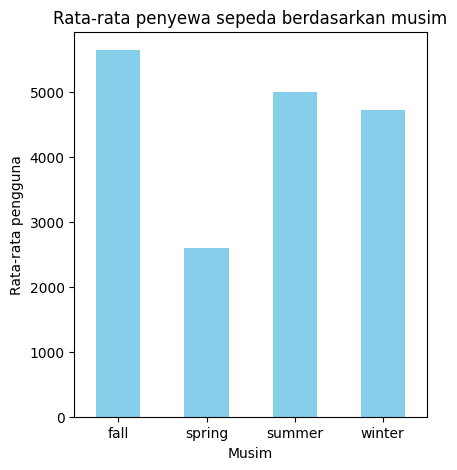

In [15]:
# Plotting the bar chart for season
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
season_data.plot(kind='bar', color='skyblue')
plt.title('Rata-rata penyewa sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata pengguna')
plt.xticks(rotation=0)

plt.show()

### Pertanyaan 2: Situasi cuaca manakah yang menjadi favorit pengendara sepeda?

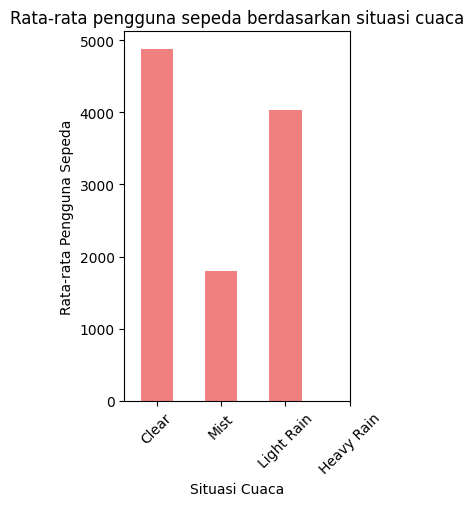

In [16]:
# Plotting the bar chart for weathersit

weather_labels = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']

plt.subplot(1, 2, 2)
weather_data.plot(kind='bar', color='lightcoral')
plt.title('Rata-rata pengguna sepeda berdasarkan situasi cuaca')
plt.xlabel('Situasi Cuaca')
plt.xticks(range(len(weather_labels)), weather_labels, rotation=45)
plt.ylabel('Rata-rata Pengguna Sepeda')

plt.show()

## Conclusion

- Conclution pertanyaan 1

Rata-rata pengguna sepeda memfavoritkan musim gugur (Fall) sebagai musim untuk menyewa sepeda

- conclution pertanyaan 2

Rata-rata pengguna sepeda memfavoritkan situasi cuaca yang cerah (Clear) sebagai situasi cuaca untuk menyewa sepeda

### Streamlit Code

In [ ]:
!pip install -q streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt



path = 'https://docs.google.com/spreadsheets/d/13T5brlCTd5VcWcc8M225_Xtcv1EgIJW-l_AjxO-tD3I/edit#gid=1023662955'
path = path.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(path)

# membuat dictionary season
season = {1: 'spring',
          2: 'summer',
          3: 'fall',
          4: 'winter'}

# map dictionary season ke dalam dataframe
df['season'] = df['season'].map(season)

# membuat dictionary season
weathersit = {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
              2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
              3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
              4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

# map dictionary season ke dalam dataframe
df['weathersit'] = df['weathersit'].map(weathersit)

season_data = df.groupby('season')['cnt'].mean()
weather_data = df.groupby('weathersit')['cnt'].mean()
weather_labels = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']

st.title("Bike Rental Analysis")

st.write(
    """
    Dashboard ini akan menjawab pertanyaan:
    1. Musim apa yang menjadi favorit pengendara sepeda?
    2. Situasi cuaca manakah yang menjadi favorit pengendara sepeda?

    Berikut grafik hasil penelusuran kami:
    """)

# Plotting the bar chart for season
fig1, ax1 = plt.subplots()
season_data.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Average Count of Rented Bikes by Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Count')

# Plotting the bar chart for weathersit with custom xticks
fig2, ax2 = plt.subplots()
weather_data.plot(kind='bar', color='lightcoral', ax=ax2)
ax2.set_title('Average Count of Rented Bikes by Weather Situation')
ax2.set_xlabel('Weather Situation')
ax2.set_ylabel('Average Count')
ax2.set_xticks(range(len(weather_labels)))
ax2.set_xticklabels(weather_labels, rotation=45)

# Display the charts using Streamlit

st.write(
    """
    ## 1. Musim apa yang menjadi favorit pengendara sepeda?
    Musim gugur (Fall) menjadi musim favorit pengendara sepeda diikuti musim panas.
    Musim dingin (winter) secara mengejutkan menjadi musim favorit ketiga dengan
    """)
st.pyplot(fig1)

st.write(
    """
    ## 2. Situasi cuaca manakah yang menjadi favorit pengendara sepeda?
    Situasi cuaca yang cerah menjadi favorit pengendara sepeda dengan situasi cuaca hujan gerimis menjadi favorit kedua.
    Situasi cuaca berkabut tidak terlalu disukai pengendara sepeda dan hujan deras tak ada satupun yang bersepeda
    """)
st.pyplot(fig2)

Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.024s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.237.4.199
npx: installed 22 in 3.641s
your url is: https://hot-emus-draw.loca.lt
